In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


# Priprema skupa podataka za rad

In [2]:
#read data

df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Analiza podataka

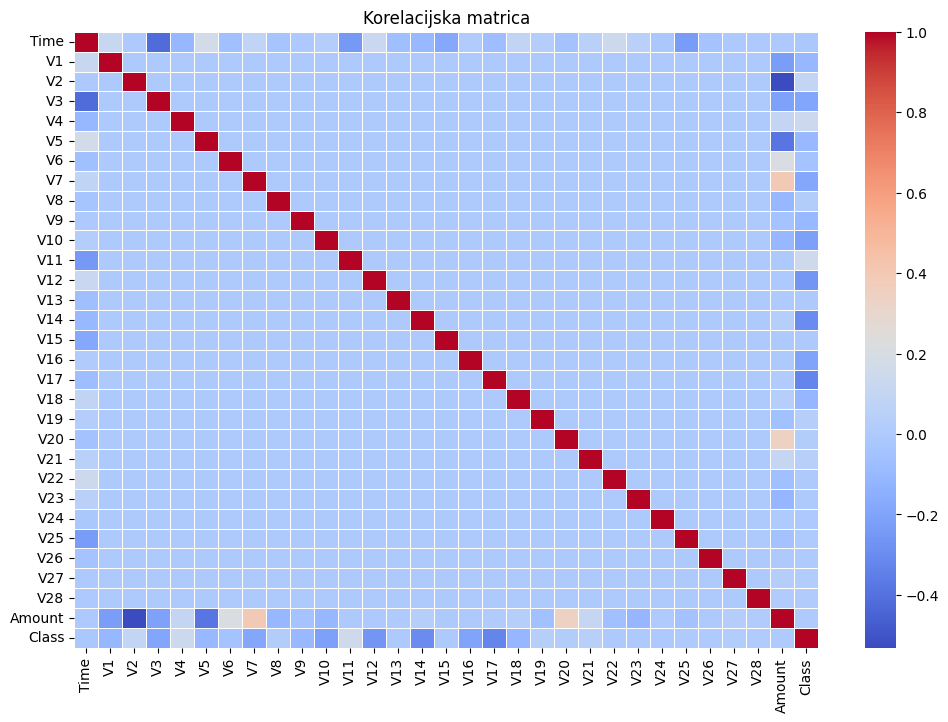

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Korelacijska matrica')
plt.show()

# Priprema podataka za treniranje




In [5]:
x = df.iloc[:,1:30]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Tradicionalne metode strojnog učenja

In [8]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
from sklearn.exceptions import ConvergenceWarning 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Logistička regresija

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.88      0.64      0.74       356

    accuracy                           1.00    199364
   macro avg       0.94      0.82      0.87    199364
weighted avg       1.00      1.00      1.00    199364



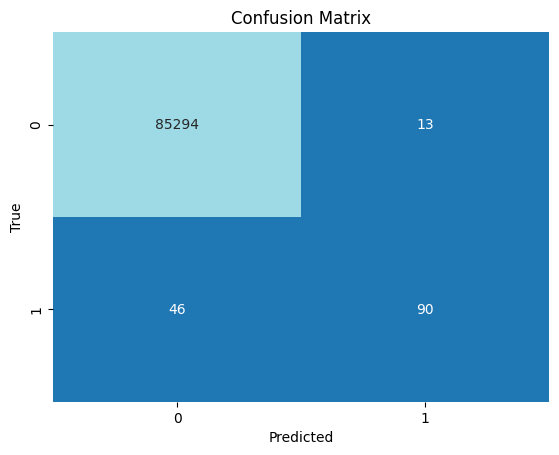

In [27]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

log_primal = LogisticRegression(C=200, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, 
                                max_iter=250, n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', 
                                tol=1e-05, verbose=0, warm_start=False)

try:
    log_primal.fit(X_train, y_train)
    print(classification_report(y_train, log_primal.predict(X_train)))

    # Generate confusion matrix using the test set
    conf_matrix = confusion_matrix(y_test, log_primal.predict(X_test))

    # Plot confusion matrix as heatmap
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="tab20", cbar=False,
                xticklabels=log_primal.classes_, yticklabels=log_primal.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

except ConvergenceWarning as e:
    print(f"Warning: Logistic Regression did not converge - {e}")
finally:
    # Reset warnings to default behavior
    warnings.filterwarnings("default")

Ostale jednostavne i kompozitne tradicionalne metode strojnog učenja su odbačene kao pretjerano vremenski zahtjevne. Ukoliko bismo imali pristup GPU paralelizaciji, možda bi ih vrijedilo ponovno razmotriti, ali ovako to nema smisla.

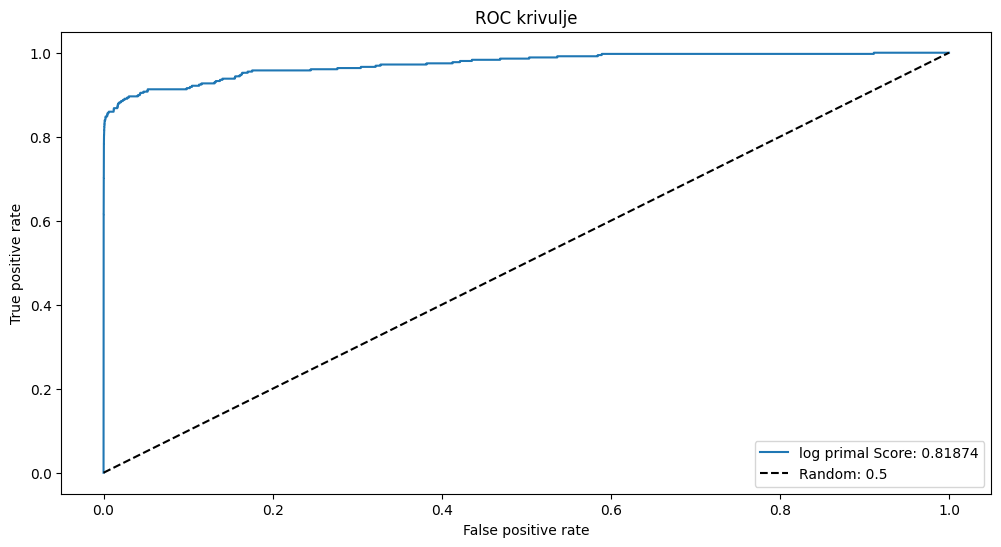

In [28]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y_train, log_primal.predict(X_train),log_primal.predict_proba(X_train)[:,1])

plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC krivulje')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

Iako je krivulja logističke regresije naizgled ok, iz tablice s detaljnim rezultatima vidimo da je model jako dobar u predviđanju kada nešto nije prevara (klasa 0), a da nije baš dobar za predviđanje kada nešto je prevara (klasa 1). Model je u pravu u 88% slučajeva kada predvidi klasu 1, ali "hvata" samo 63% instanci klase 1.

# Neuronske mreže

In [12]:
import tensorflow
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

U idućem primjeru koristimo sekvencijalni model biblioteke "keras". Sekvencijalni model omogućuje stvaranje neuronske mreže pomoću linearnog dodavanja stoga slojeva. U ovom primjeru, dodajemo slojeve po kerasovom "dense" modelu, odnosno, slojeve potpuno povezanih neurona.

In [13]:
n_input = len(x.columns)

model_Seq_Dense = Sequential()

model_Seq_Dense.add(Dense(50, input_dim=n_input, activation='relu', kernel_initializer='he_normal'))

model_Seq_Dense.add(Dense(1, activation='sigmoid'))

model_Seq_Dense.compile(loss='binary_crossentropy', optimizer='adam')
model_Seq_Dense.fit(X_train,y_train,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0201
Epoch 2/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0128
Epoch 3/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0088
Epoch 4/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0122
Epoch 5/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0108
Epoch 6/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0109
Epoch 7/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0074
Epoch 8/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0100
Epoch 9/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0080
Epoch 10/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0077


6231/6231 [==============================] - 8s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.87      0.83      0.85       356

    accuracy                           1.00    199364
   macro avg       0.94      0.92      0.93    199364
weighted avg       1.00      1.00      1.00    199364

2671/2671 [==============================] - 4s 1ms/step


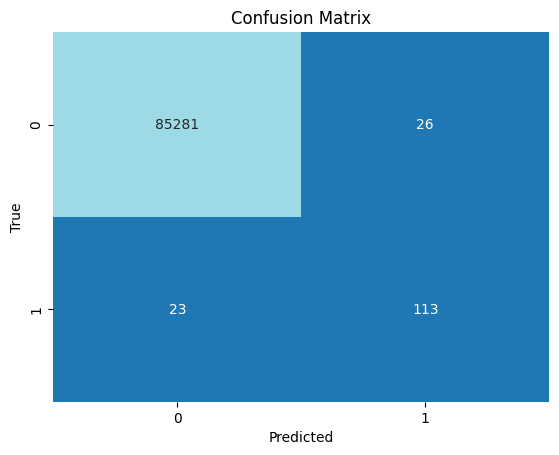

In [15]:
# Predict and print classification report
y_pred_train = (model_Seq_Dense.predict(X_train) > 0.5).astype(int)
print("Classification Report:")
print(classification_report(y_train, y_pred_train))

# Generate confusion matrix using the test set
conf_matrix = confusion_matrix(y_test, (model_Seq_Dense.predict(X_test) > 0.5).astype(int))

# Plot confusion matrix as heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="tab20", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

U idućem primjeru koristimo LSTM.

In [16]:
n_input = len(X_train.columns)

model_LSTM = Sequential()

# Add an LSTM layer with 50 units and input shape (timesteps, num_features)
model_LSTM.add(LSTM(units=50, input_shape=(n_input, 1)))  # Adjust input shape based on your data

# Dense layer for output
model_LSTM.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy')

# Reshape X_train to fit LSTM input shape (samples, timesteps, features)
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

# Fit the model
model_LSTM.fit(X_train_reshaped, y_train, epochs=10)

Epoch 1/10
6231/6231 [==============================] - 103s 16ms/step - loss: 0.0077
Epoch 2/10
6231/6231 [==============================] - 101s 16ms/step - loss: 0.0043
Epoch 3/10
6231/6231 [==============================] - 100s 16ms/step - loss: 0.0043
Epoch 4/10
6231/6231 [==============================] - 100s 16ms/step - loss: 0.0041
Epoch 5/10
6231/6231 [==============================] - 101s 16ms/step - loss: 0.0040
Epoch 6/10
6231/6231 [==============================] - 100s 16ms/step - loss: 0.0041
Epoch 7/10
6231/6231 [==============================] - 101s 16ms/step - loss: 0.0040
Epoch 8/10
6231/6231 [==============================] - 100s 16ms/step - loss: 0.0039
Epoch 9/10
6231/6231 [==============================] - 100s 16ms/step - loss: 0.0037
Epoch 10/10
6231/6231 [==============================] - 101s 16ms/step - loss: 0.0036


6231/6231 [==============================] - 38s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.90      0.68      0.77       356

    accuracy                           1.00    199364
   macro avg       0.95      0.84      0.89    199364
weighted avg       1.00      1.00      1.00    199364

2671/2671 [==============================] - 16s 6ms/step


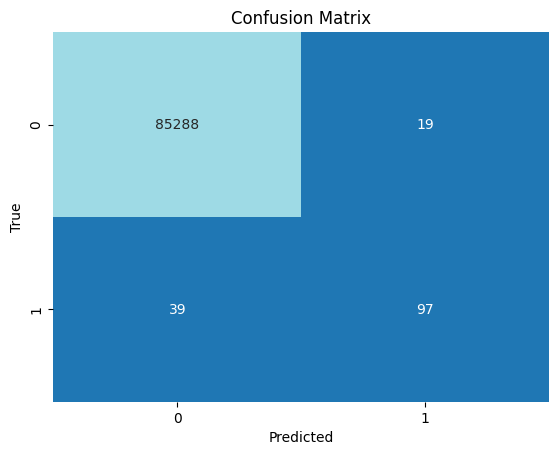

In [18]:
# Predict and print classification report
X_train_pred = (model_LSTM.predict(X_train_reshaped) > 0.5).astype(int)
print("Classification Report:")
print(classification_report(y_train, X_train_pred))

# Reshape X_test to fit LSTM input shape
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Generate confusion matrix using the test set
conf_matrix = confusion_matrix(y_test, (model_LSTM.predict(X_test_reshaped) > 0.5).astype(int))

# Plot confusion matrix as heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="tab20", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

2671/2671 [==============================] - 16s 6ms/step


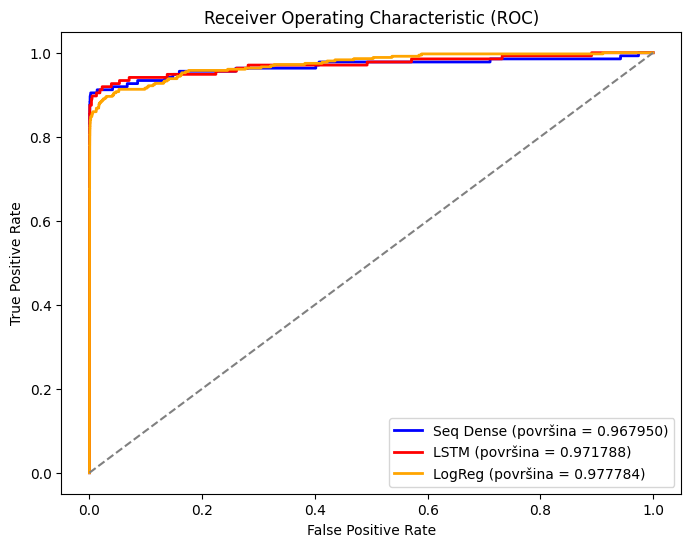

ROC AUC za Sequential Dense model: 0.9679504871333227
ROC AUC za LSTM model: 0.9717882264678646


In [30]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the test sets for both models
y_pred_prob_seq_dense = model_Seq_Dense.predict(X_test)
y_pred_prob_lstm = model_LSTM.predict(X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1)))



# Compute ROC curve and ROC area for both models
fpr_seq_dense, tpr_seq_dense, _ = roc_curve(y_test, y_pred_prob_seq_dense)
roc_auc_seq_dense = auc(fpr_seq_dense, tpr_seq_dense)
y_prob = log_primal.predict_proba(X_test)[:, 1]  # Probability of the positive class
roc_auc_log = roc_auc_score(y_test, y_prob) 

fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_prob_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot ROC curves for both models on the same graph
plt.figure(figsize=(8, 6))

plt.plot(fpr_seq_dense, tpr_seq_dense, color='blue', lw=2, label='Seq Dense (površina = %f)' % roc_auc_seq_dense)
plt.plot(fpr_lstm, tpr_lstm, color='red', lw=2, label='LSTM (površina = %f)' % roc_auc_lstm)
plt.plot(fpr_log_primal, tpr_log_primal, color = 'orange', lw=2, label = 'LogReg (površina = %f)' % roc_auc_log)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

plt.show()

print("ROC AUC za Sequential Dense model:", roc_auc_seq_dense)
print("ROC AUC za LSTM model:", roc_auc_lstm)

# Analiza
  * Svi modeli imaju visoku točnost (accuracy), što bi moglo biti do činjenice da klasa 0 debelo dominira
  * Po pitanju preciznosti (precision), F1 i opoziva (recall), gusta neuronska mreža je nešto bolja i od LSTM i logističke regresije
  * LSTM ima najvišu preciznost za klasu 1, ali niži opoziv (recall) u odnosu na gustu neuronsku mrežu
  * logreg ima najbolju površinu pod ROC krivuljom
  * s obzirom na to da je cijela poanta ove bilježnica predikcija klase 1, odnosno predikcija prevara s kreditnim karticama, visoka preciznost LSTM-a specifično za klasu 1 je poželjna

  
  * na većim skupovima postoji rizik da logreg ne konvergira (trebalo je ubaciti error catch i na ovom skupu)
  * LSTM se trenira znatno duže od guste neuronske mreže
  
  